In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

# SciPy

[Website](https://www.scipy.org/)

SciPy is a package of libraries used on scientific numerical analysis, and has libraries spanning an incredible amount of topics.

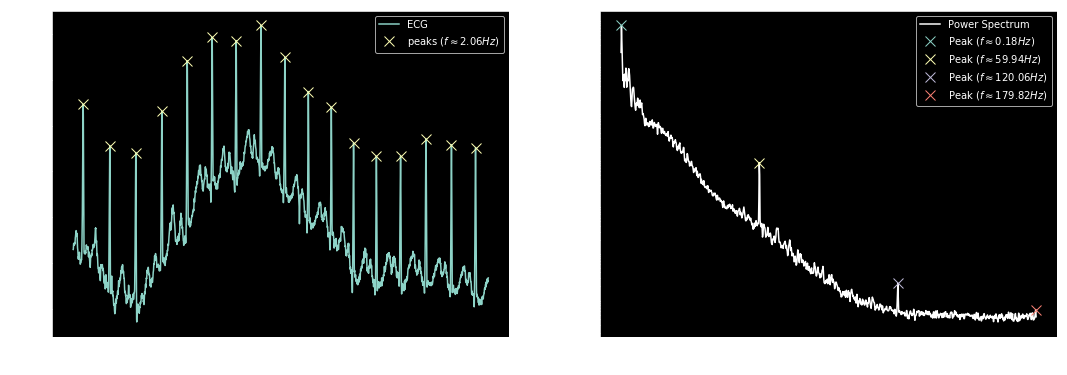

In [2]:
from scipy.misc import electrocardiogram
from scipy.signal import welch, find_peaks

fs = 360 # from the docs
ecg_complete = electrocardiogram()
time_complete = np.arange(ecg_complete.size) / fs

time_window = [4.5, 12.7]
inds = (time_complete >= time_window[0]) & (time_complete <= time_window[1])

ecg = ecg_complete[inds]
time = time_complete[inds]

peaks_ind, _ = find_peaks(ecg, prominence=1)
avg_period = np.mean(np.diff(time[peaks_ind]))
avg_freq = 1/avg_period

plt.figure(figsize=(18, 6))

plt.subplot(121)

plt.plot(time, ecg, label='ECG')
plt.plot(time[peaks_ind], ecg[peaks_ind], 'x', ms=10, label='peaks ($f \\approx %.2f Hz$)'%avg_freq)

plt.xlabel("time in s")
plt.ylabel("ECG in mV")

plt.legend(loc='best')

plt.subplot(122)

f, Pxx = welch(ecg_complete, fs=fs, nperseg=2048, scaling="spectrum")

f_peaks, _ = find_peaks(Pxx, distance=200)

plt.semilogy(f, Pxx, 'w-', label='Power Spectrum')
for peak in f_peaks[:10]:
    plt.plot(f[peak], Pxx[peak], 'x', ms=10, label='Peak ($f \\approx %.2f Hz$)'%f[peak])

plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the ECG in mV**2")

plt.legend()

plt.show()

# pandas

[Website](http://pandas.pydata.org/)

pandas is a library to work with tabular data and time series.

In [3]:
import pandas as pd

df = pd.read_csv('shots_settings.csv', index_col=0)
display(df)

,shot,window_start,window_end,elm_start,elm_end
id,,,,,
84771_1,84771,49.58,50.49,49.93,50.13
84771_2,84771,50.99,51.64,51.13,51.25
84772_1,84772,49.58,50.49,50.01,50.18
84772_2,84772,51.19,52.02,51.75,51.84
84773_1,84773,49.49,50.50,50.02,50.24
84773_2,84773,51.15,52.10,51.25,51.45
86688_1,86688,49.56,50.18,49.72,49.82
86688_2,86688,50.99,51.87,51.71,51.82
86689_1,86689,49.49,50.49,50.09,50.21


In [4]:
df = pd.DataFrame([[np.random.choice(['A', 'B', 'C']), np.random.randint(0, 20)] for i in range(10)], columns=['letter', 'number'])
display(df)

display(df.groupby('letter').mean())

,letter,number
0,B,13
1,B,18
2,A,19
3,B,18
4,C,4
5,C,2
6,A,7
7,B,3
8,C,13
9,A,5


,number
letter,
A,10.333333
B,13.000000
C,6.333333


# PyQt

[Website](https://www.riverbankcomputing.com/software/pyqt/intro)

PyQt is a set of python bindings for the C++'s Qt library for GUI development.

# PyQtGraph

[Website](http://www.pyqtgraph.org/)

PyQtGraph is a visualization library written in PyQt and NumPy for fast (real-time) plotting.

# SymPy

[Website](https://www.sympy.org/en/index.html)

SymPy is a library for symbolic maths.

In [5]:
from sympy import Symbol, integrate, init_printing, Integral, latex, symbols, Function, Derivative, dsolve, Eq

init_printing(use_latex='mathjax')

x = Symbol('x')
f = x**2 + x + 1
integral = integrate(f, x)
display(Eq(Integral(f, x), integral))

fx = Function('fx')
fx_2 = Derivative(fx(x), x)
deq = Eq(fx(x), fx_2)
display(deq)
display(dsolve(deq, fx(x)))

⌠                    3    2    
⎮ ⎛ 2        ⎞      x    x     
⎮ ⎝x  + x + 1⎠ dx = ── + ── + x
⌡                   3    2     

        d        
fx(x) = ──(fx(x))
        dx       

            x
fx(x) = C₁⋅ℯ 